opsim minisurveies

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp

In [2]:
from utils import DBPATH_V1_4, DBNAMES_V1_4
from utils import plot_mwd, RADec2pix, get_cols, load_starmap, get_starDensity
# utils also included end of the notebook 

In [3]:
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.4/"  # path to all opsim v1.4 databases
COLS = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
# lim = 'night < 400'

In [8]:
DBNAMES_V1_4

['agnddf_v1.4_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.4_10yrs.db',
 'baseline_2snapsv1.4_10yrs.db',
 'baseline_v1.4_10yrs.db',
 'bulges_bs_v1.4_10yrs.db',
 'bulges_bulge_wfd_v1.4_10yrs.db',
 'bulges_cadence_bs_v1.4_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.4_10yrs.db',
 'bulges_cadence_i_heavy_v1.4_10yrs.db',
 'bulges_i_heavy_v1.4_10yrs.db',
 'dcr_nham1_v1.4_10yrs.db',
 'dcr_nham2_v1.4_10yrs.db',
 'dcr_nham3_v1.4_10yrs.db',
 'dcr_nham4_v1.4_10yrs.db',
 'dcr_nham5_v1.4_10yrs.db',
 'descddf_v1.4_10yrs.db',
 'euclidddf_v1.4_10yrs.db',
 'footprint_add_mag_cloudsv1.4_10yrs.db',
 'footprint_big_sky_dustv1.4_10yrs.db',
 'footprint_big_sky_nouiyv1.4_10yrs.db',
 'footprint_big_skyv1.4_10yrs.db',
 'footprint_bluer_footprintv1.4_10yrs.db',
 'footprint_gp_smoothv1.4_10yrs.db',
 'footprint_newAv1.4_10yrs.db',
 'footprint_newBv1.4_10yrs.db',
 'footprint_no_gp_northv1.4_10yrs.db',
 'footprint_standard_goalsv1.4_10yrs.db',
 'footprint_stuck_rollingv1.4_10yrs.db',
 'pair_strategy_0_v1.4_10yrs.db',
 

In [4]:
# baseline
dbname = 'baseline_v1.4_10yrs.db'
df_base = get_cols(dbfile=dbpath + dbname, cols=COLS)
# dcr, high_am, g/u
dbname = 'dcr_nham1_v1.4_10yrs.db'
df_dcr = get_cols(dbfile=dbpath + dbname, cols=COLS)
# twilight_neo
dbname = 'twilight_neo_mod1_v1.4_10yrs.db'
df_twi = get_cols(dbfile=dbpath + dbname, cols=COLS)
# short 
dbname = 'short_exp_2ns_1expt_v1.4_10yrs.db'
df_short = get_cols(dbfile=dbpath + dbname, cols=COLS)
# sat
dbname = 'sat_dodge_v1.4_10yrs.db'
df_sat = get_cols(dbfile=dbpath + dbname, cols=COLS)

connect to  /home/idies/workspace/lsst_cadence/FBS_1.4/baseline_v1.4_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps
connect to  /home/idies/workspace/lsst_cadence/FBS_1.4/dcr_nham1_v1.4_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps
connect to  /home/idies/workspace/lsst_cadence/FBS_1.4/twilight_neo_mod1_v1.4_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps
connect to  /home/idies/workspace/lsst_cadence/FBS_1.4/short_exp_2ns_1expt_v1.4_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps
connect to  /home/idies/workspace/lsst_cadence/FBS_1.4/sat_dodge_v1.4_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps


In [82]:
# get healpixId for each field
df_base = get_pixId(df_base)
df_dcr = get_pixId(df_dcr)
df_twi = get_pixId(df_twi)
df_short = get_pixId(df_short)
df_sat = get_pixId(df_sat)


In [135]:
bydic_test = {
    "night": "count",
    "observationStartMJD": list,
    "fieldRA" : "mean",
    "fieldDec": "mean",
}


In [150]:
df_base.head()

,night,observationStartMJD,fieldRA,fieldDec,filter,proposalId,note,pixId
0,1,59853.985644,294.696105,4.470982,z,0,greedy,1428
1,1,59853.986058,297.734708,3.424593,z,1,greedy,1493
2,1,59853.986472,300.801528,2.671025,z,1,greedy,1429
3,1,59853.986884,298.330258,0.734934,z,1,greedy,1493
4,1,59853.987297,295.864474,-1.054837,z,1,greedy,1556


In [151]:
df_base.tail()

,night,observationStartMJD,fieldRA,fieldDec,filter,proposalId,note,pixId
2180584,3686,63506.392236,76.627084,-0.080620,i,1,greedy,1517
2180585,3686,63506.392657,78.197741,5.089281,i,0,greedy,1389
2180586,3686,63506.393070,80.969264,4.065248,i,1,greedy,1390
2180587,3686,63506.393483,83.743185,3.068510,i,1,greedy,1455
2180588,3686,63506.393898,84.251774,0.038561,i,1,greedy,1518


In [136]:
df = df_base

# slice required dataframe 
# Deep drilling
slicer = ( df['night'] < 1000 ) & (df['proposalId']==1) 
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic_test).rename(columns={"night": "Nv"})


In [139]:
df.head()

,pixId,filter,Nv,observationStartMJD,fieldRA,fieldDec
0,1376,g,7,"[59897.059476744595, 59897.07617550882, 59897....",3.463371,3.705442
1,1376,i,10,"[59867.22371255658, 60124.407118790274, 60203....",2.743436,3.528952
2,1376,r,19,"[59897.01327042653, 59897.013652370966, 59897....",3.220477,3.633301
3,1376,u,8,"[60232.14544547169, 60232.16006329807, 60232.1...",2.843020,3.760420
4,1376,y,17,"[59904.054892707034, 59904.07088934662, 60182....",2.957979,3.327133


In [142]:
np.unique(df_twi['note'])

array(['DD:290', 'DD:COSMOS', 'DD:ECDFS', 'DD:ELAISS1', 'DD:XMM-LSS',
       'DD:u,290', 'DD:u,COSMOS', 'DD:u,ECDFS', 'DD:u,ELAISS1',
       'DD:u,XMM-LSS', 'blob, gr, a', 'blob, gr, b', 'blob, iz, a',
       'blob, iz, b', 'blob, ri, a', 'blob, ri, b', 'blob, ug, a',
       'blob, ug, b', 'blob, ur, a', 'blob, ur, b', 'blob, uu, a',
       'blob, uu, b', 'blob, yy, a', 'blob, yy, b', 'blob, zy, a',
       'blob, zy, b', 'greedy', 'twilight_neo'], dtype=object)

In [143]:
df_twi.groupby(by=['proposalId', 'note']).count()

night  observationStartMJD  fieldRA  fieldDec  \
proposalId note                                                           
0          blob, gr, a    14713                14713    14713     14713   
           blob, gr, b    14617                14617    14617     14617   
           blob, iz, a    13684                13684    13684     13684   
           blob, iz, b    13552                13552    13552     13552   
           blob, ri, a     6853                 6853     6853      6853   
           blob, ri, b     6753                 6753     6753      6753   
           blob, ug, a     5415                 5415     5415      5415   
           blob, ug, b     5319                 5319     5319      5319   
           blob, ur, a       65                   65       65        65   
           blob, ur, b       59                   59       59        59   
           blob, uu, a     5637                 5637     5637      5637   
           blob, uu, b     5525                 5525     5525      5525   
           blob, yy, a    11592                11592    11592     11592   
           blob, yy, b    11450                11450    11450     11450   
           blob, zy, a     4983                 4983     4983      4983   
           blob, zy, b     4930                 4930     4930      4930   
           greedy          1959                 1959     1959      1959   
           twilight_neo  415190               415190   415190    415190   
1          blob, gr, a   142249               142249   142249    142249   
           blob, gr, b   140858               140858   140858    140858   
           blob, iz, a   141055               141055   141055    141055   
           blob, iz, b   139938               139938   139938    139938   
           blob, ri, a   127329               127329   127329    127329   
           blob, ri, b   126014               126014   126014    126014   
           blob, ug, a    35981                35981    35981     35981   
           blob, ug, b    35733                35733    35733     35733   
           blob, ur, a     2497                 2497     2497      2497   
           blob, ur, b     2386                 2386     2386      2386   
           blob, uu, a    40565                40565    40565     40565   
           blob, uu, b    40140                40140    40140     40140   
           blob, yy, a   168828               168828   168828    168828   
           blob, yy, b   167313               167313   167313    167313   
           blob, zy, a    84536                84536    84536     84536   
           blob, zy, b    83991                83991    83991     83991   
           greedy         88139                88139    88139     88139   
           twilight_neo  589898               589898   589898    589898   
2          DD:XMM-LSS     48835                48835    48835     48835   
           DD:u,XMM-LSS    1374                 1374     1374      1374   
3          DD:ECDFS       53880                53880    53880     53880   
           DD:u,ECDFS      2512                 2512     2512      2512   
4          DD:COSMOS      53100                53100    53100     53100   
           DD:u,COSMOS     1560                 1560     1560      1560   
5          DD:290         45926                45926    45926     45926   
           DD:u,290        1272                 1272     1272      1272   
6          DD:ELAISS1     50073                50073    50073     50073   
           DD:u,ELAISS1    1352                 1352     1352      1352   

                         filter   pixId  
proposalId note                          
0          blob, gr, a    14713   14713  
           blob, gr, b    14617   14617  
           blob, iz, a    13684   13684  
           blob, iz, b    13552   13552  
           blob, ri, a     6853    6853  
           blob, ri, b     6753    6753  
           blob, ug, a     5415    5415  
           blob, ug, b     5319    5319  
     

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


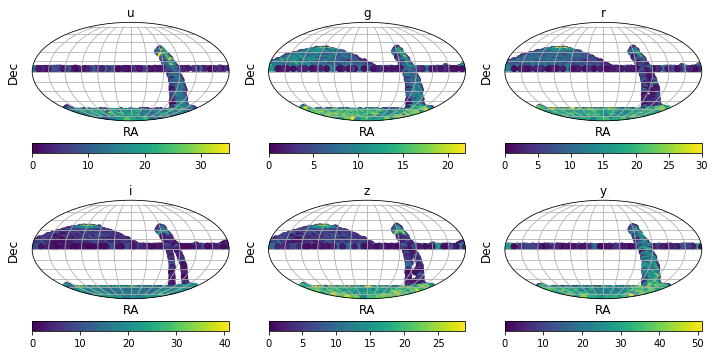

In [145]:
df = df_twi

# slice required dataframe 
# Deep drilling
slicer = ( df['night'] < 1000 ) & (df['proposalId']==0) & (df['note'].str.contains('blob'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=None)

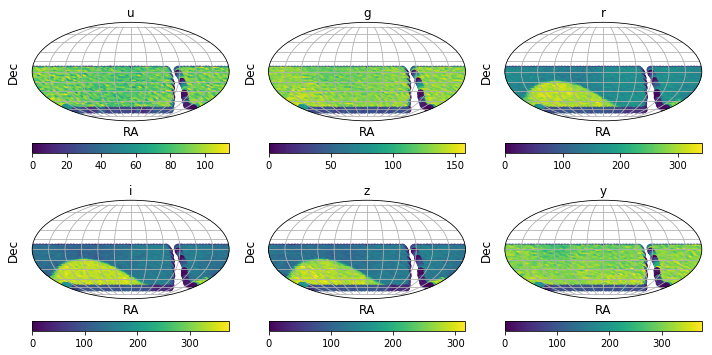

In [147]:
df = df_twi

# slice required dataframe 
# Deep drilling
slicer =  (df['proposalId']==1) & (df['note'].str.contains('blob'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=None)

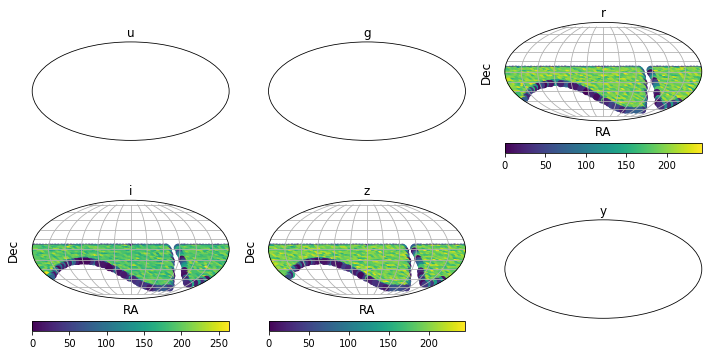

In [148]:
df = df_twi

# slice required dataframe 
# Deep drilling
slicer = (df['proposalId']==1) & (df['note'].str.contains('twi'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=None)

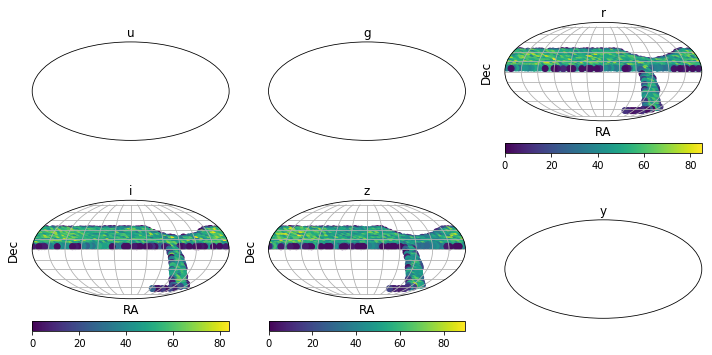

In [144]:
df = df_twi

# slice required dataframe 
# Deep drilling
slicer = ( df['night'] < 1000 ) & (df['proposalId']==0) & (df['note'].str.contains('twi'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=None)

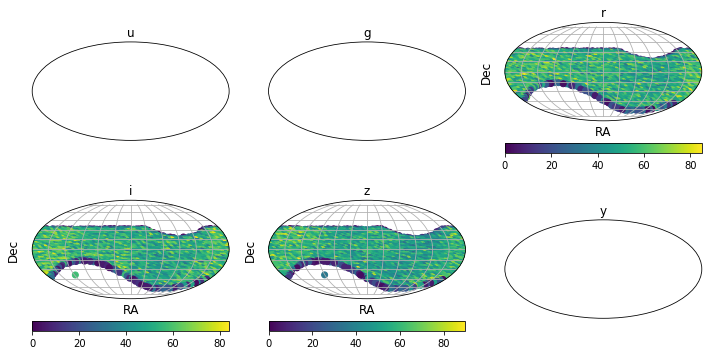

In [90]:
df = df_twi

# slice required dataframe 
slicer = ( df['night'] < 1000 ) & (df['note'].str.contains('twi'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=None)

In [141]:
np.unique(df_dcr.note)

array(['DD:290', 'DD:COSMOS', 'DD:ECDFS', 'DD:ELAISS1', 'DD:XMM-LSS',
       'DD:u,290', 'DD:u,COSMOS', 'DD:u,ECDFS', 'DD:u,ELAISS1',
       'DD:u,XMM-LSS', 'blob, gr, a', 'blob, gr, b', 'blob, iz, a',
       'blob, iz, b', 'blob, ri, a', 'blob, ri, b', 'blob, ug, a',
       'blob, ug, b', 'blob, ur, a', 'blob, ur, b', 'blob, uu, a',
       'blob, uu, b', 'blob, yy, a', 'blob, yy, b', 'blob, zy, a',
       'blob, zy, b', 'greedy', 'high_am, g', 'high_am, u'], dtype=object)

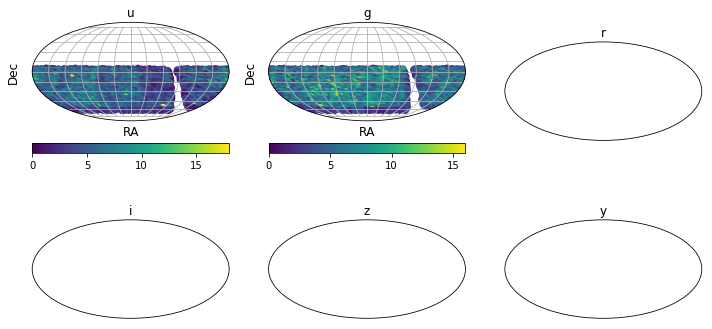

In [87]:
df = df_dcr

# slice required dataframe 
# Deep drilling
slicer = ( df['night'] < 1000 ) & (df['note'].str.contains('high'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=None)

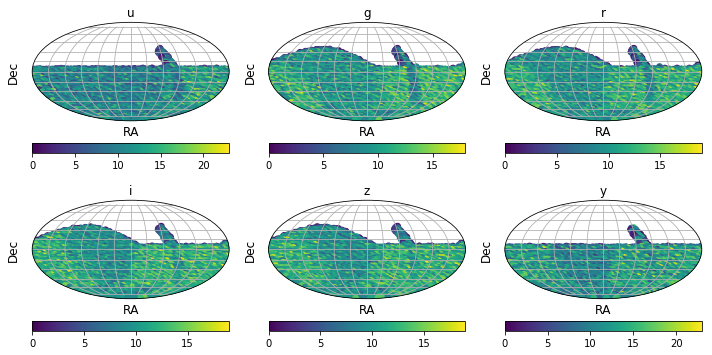

In [95]:
df = df_short

# slice required dataframe 
# Deep drilling
slicer = ( df['night'] < 1000 ) & (df['note'].str.contains('short'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=None)

In [102]:
np.unique(df_base.note)

array(['DD:290', 'DD:COSMOS', 'DD:ECDFS', 'DD:ELAISS1', 'DD:XMM-LSS',
       'DD:u,290', 'DD:u,COSMOS', 'DD:u,ECDFS', 'DD:u,ELAISS1',
       'DD:u,XMM-LSS', 'blob, gr, a', 'blob, gr, b', 'blob, iz, a',
       'blob, iz, b', 'blob, ri, a', 'blob, ri, b', 'blob, ug, a',
       'blob, ug, b', 'blob, ur, a', 'blob, ur, b', 'blob, uu, a',
       'blob, uu, b', 'blob, yy, a', 'blob, yy, b', 'blob, zy, a',
       'blob, zy, b', 'greedy'], dtype=object)

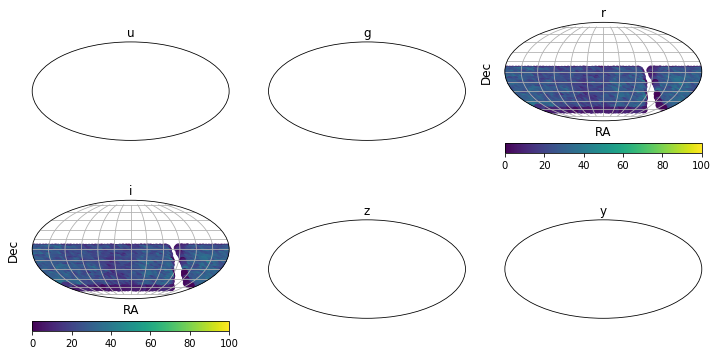

In [107]:
df = df_base

# slice required dataframe 
# Deep drilling
slicer = ( df['night'] < 1000 ) & (df['proposalId']==1) & ( df['note'].str.contains('ri'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=100)

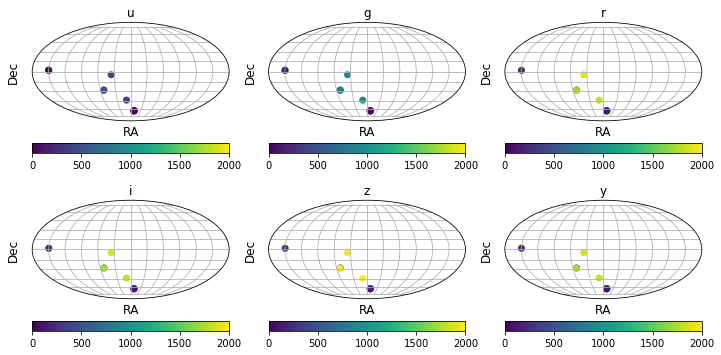

In [78]:
df = df_base

# slice required dataframe 
# Deep drilling
slicer = ( df['night'] < 1000 ) & (df['note'].str.contains('DD'))
df = df[slicer]

df = df.groupby(by=['pixId', 'filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, vmax=2000)

---

utils

In [65]:
FILTERS = ['u', 'g', 'r', 'i', 'z', 'y']

In [77]:
# groupby healpix
bydic = {
    "observationStartMJD": "count",
    "fieldRA" : "mean",
    "fieldDec": "mean",
}

In [8]:
def get_pixId(df):
    '''get pixId for each field'''
    pixId = RADec2pix(nside=16, ra=df['fieldRA'].values, dec=df['fieldDec'].values)
    df['pixId'] = pixId
    return df


In [76]:
def plot_filter_Nv(df, colorbar=True, vmax=None):
    fig, axs = plt.subplots(2, 3, figsize=(12, 6), 
                            subplot_kw={'projection': 'mollweide'}); 
    axs = axs.ravel()
    
    for i, f in enumerate(FILTERS):
        
        df_ = df[ df['filter']==f ]
        x = df_['fieldRA'].values
        y = df_['fieldDec'].values
        c = df_['Nv'].values
        if len(c)!=0:
            plot_mwd(axs[i], x, y, c, title=f, colorbar=colorbar, vmax=vmax)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        axs[i].set_title(f)


In [53]:
def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', vmax=None, colorbar=True):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
    '''
    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='o', vmin=0, vmax=vmax)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)

In [ ]:
# %%writefile utils.py

# variables
DBPATH_V1_4 = "/home/idies/workspace/lsst_cadence/FBS_1.4/"
DBNAMES_V1_4 = ['agnddf_v1.4_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.4_10yrs.db',
 'baseline_2snapsv1.4_10yrs.db',
 'baseline_v1.4_10yrs.db',
 'bulges_bs_v1.4_10yrs.db',
 'bulges_bulge_wfd_v1.4_10yrs.db',
 'bulges_cadence_bs_v1.4_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.4_10yrs.db',
 'bulges_cadence_i_heavy_v1.4_10yrs.db',
 'bulges_i_heavy_v1.4_10yrs.db',
 'dcr_nham1_v1.4_10yrs.db',
 'dcr_nham2_v1.4_10yrs.db',
 'dcr_nham3_v1.4_10yrs.db',
 'dcr_nham4_v1.4_10yrs.db',
 'dcr_nham5_v1.4_10yrs.db',
 'descddf_v1.4_10yrs.db',
 'euclidddf_v1.4_10yrs.db',
 'footprint_add_mag_cloudsv1.4_10yrs.db',
 'footprint_big_sky_dustv1.4_10yrs.db',
 'footprint_big_sky_nouiyv1.4_10yrs.db',
 'footprint_big_skyv1.4_10yrs.db',
 'footprint_bluer_footprintv1.4_10yrs.db',
 'footprint_gp_smoothv1.4_10yrs.db',
 'footprint_newAv1.4_10yrs.db',
 'footprint_newBv1.4_10yrs.db',
 'footprint_no_gp_northv1.4_10yrs.db',
 'footprint_standard_goalsv1.4_10yrs.db',
 'footprint_stuck_rollingv1.4_10yrs.db',
 'pair_strategy_0_v1.4_10yrs.db',
 'pair_strategy_1_v1.4_10yrs.db',
 'pair_strategy_2_v1.4_10yrs.db',
 'pair_strategy_3_v1.4_10yrs.db',
 'pair_strategy_4_v1.4_10yrs.db',
 'roll_mod2_dust_sdf_0.20_v1.4_10yrs.db',
 'rolling_mod2_sdf_0.10_v1.4_10yrs.db',
 'rolling_mod2_sdf_0.20_v1.4_10yrs.db',
 'rolling_mod3_sdf_0.10_v1.4_10yrs.db',
 'rolling_mod3_sdf_0.20_v1.4_10yrs.db',
 'rolling_mod6_sdf_0.10_v1.4_10yrs.db',
 'rolling_mod6_sdf_0.20_v1.4_10yrs.db',
 'sat_dodge_v1.4_10yrs.db',
 'short_exp_2ns_1expt_v1.4_10yrs.db',
 'short_exp_2ns_5expt_v1.4_10yrs.db',
 'short_exp_5ns_1expt_v1.4_10yrs.db',
 'short_exp_5ns_5expt_v1.4_10yrs.db',
 'spiders_v1.4_10yrs.db',
 'twi_filters_1_v1.4_10yrs.db',
 'twi_filters_2_v1.4_10yrs.db',
 'twi_filters_3_v1.4_10yrs.db',
 'twi_filters_4_v1.4_10yrs.db',
 'twi_filters_5_v1.4_10yrs.db',
 'twilight_neo_mod1_v1.4_10yrs.db',
 'twilight_neo_mod2_v1.4_10yrs.db',
 'twilight_neo_mod3_v1.4_10yrs.db',
 'twilight_neo_mod4_v1.4_10yrs.db',
 'var_expt_v1.4_10yrs.db',
 'weather_0.3_v1.4_10yrs.db',
 'weather_0.7_v1.4_10yrs.db',
 'weather_1.2_ndt_v1.4_10yrs.db',
 'weather_1.2_v1.4_10yrs.db',
 'wfd_depth_scale0.65_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.65_v1.4_10yrs.db',
 'wfd_depth_scale0.70_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.70_v1.4_10yrs.db',
 'wfd_depth_scale0.75_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.75_v1.4_10yrs.db',
 'wfd_depth_scale0.80_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.80_v1.4_10yrs.db',
 'wfd_depth_scale0.85_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.85_v1.4_10yrs.db',
 'wfd_depth_scale0.90_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.90_v1.4_10yrs.db',
 'wfd_depth_scale0.95_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.95_v1.4_10yrs.db',
 'wfd_depth_scale0.99_noddf_v1.4_10yrs.db',
 'wfd_depth_scale0.99_v1.4_10yrs.db']

# plot skymap
import numpy as np
import matplotlib.pyplot as plt

def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', vmax=None, colorbar=True):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
    '''
    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='o', vmin=0, vmax=vmax)  # convert degrees to radians
    # ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)

# ------------------------------------------------------------------- #
# builtin star density map
# ------------------------ #
import os
import healpy as hp
from lsst.utils import getPackageDir
from scipy.interpolate import interp1d
from lsst.sims.maf.utils import radec2pix

def load_starmap(flt='r'):
    # get mapdir '/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/StarMaps'
    mapDir = os.path.join(getPackageDir('sims_maps'),'StarMaps') 

    mapfile = 'starDensity_{}_nside_64.npz'.format(flt)

    starMap = np.load( os.path.join(mapDir, mapfile) )
    
    return starMap
      
def get_starDensity(ra=0, dec=0, starMap=None, mag=25):
    '''get star density of a field, from star density map,
    input ra, dec in degree 
    returns stars / (sq degree)
    '''
    ra = ra * np.pi / 180   # convert to radian
    dec = dec * np.pi / 180

    starMapDensity = starMap['starDensity'].copy()
    starMapBins = starMap['bins'].copy()
    starmapNside = hp.npix2nside( np.size(starMapDensity[:,0]) )
    
    ipix = radec2pix(starmapNside, ra, dec) # convert from ra/dec to ipix 
    density = interp1d( starMapBins[1:], starMapDensity[ipix, :] ) (mag)
    return int( density )

#  get columns from databases
import sqlite3
import pandas as pd
def get_cols(dbfile, cols='night', lim=None):
    """
    cols = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
    connect to database
    Returns: a pandas DataFrame
    
    Examples:
    
    cols = 'night, observationStartMJD, fieldRA, filter, fieldDec, proposalId, note, '

    df = get_cols(dbfile=dbpath + db, cols=cols, lim='night<300')
   
    """
    connection = sqlite3.connect(dbfile)
    cursor = connection.cursor()
    
    if lim!=None:
        sqlstr = "SELECT {} FROM SummaryAllProps where {}".format(cols, lim)
    else:
        sqlstr = "SELECT {} FROM SummaryAllProps".format(cols)

    print('connect to ', dbfile, '\n', sqlstr)
    cursor.execute(sqlstr)
    data = cursor.fetchall()
    
    # convert data to dataframe
    data_df = pd.DataFrame(data, columns=cols.split(', '))
    
    # close connection
    connection.close()
    
    return data_df

# new defined RADec2pix, default in degree 
def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid

